### - Sobhan Moradian Daghigh
#### - 4/9/2022
#### - DIP - HW01 - Q1

In [50]:
import numpy as np
from PIL import Image
import cv2
import glob
import os
import matplotlib.pyplot as plt

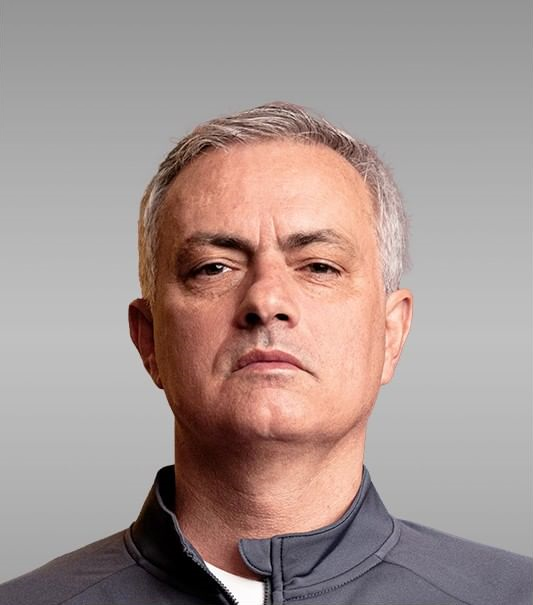

In [2]:
img = Image.open('../DIP_HW1/inputs/P1/jose_mourinho.png')
img

In [3]:
def immirror(img, point):
    x, y = point
    L = img[:, :x]
    R = img[:, x:]
    
    LL   = np.zeros((img.shape[0], L.shape[1] * 2, 3), dtype=np.uint8)
    RR = np.zeros((img.shape[0], R.shape[1] * 2, 3), dtype=np.uint8)
    
    LL[:, :x] = L
    RR[:, R.shape[1]:] = R
    
    for i in range(x):
        LL[:, x + i] = L[:, x - i - 1]
    for i in range(R.shape[1]):
        RR[:, i] = R[:, R.shape[1] - i - 1]
        
    return LL, RR

In [32]:
def croper(img, ref):
    x_img = img.shape[1]
    x_ref = ref.shape[1]
    
    if x_img < x_ref:
        margin = (x_ref - x_img) // 2
        ref = ref[:, margin:margin + x_img]
        
    elif x_img > x_ref:
        margin = (x_img - x_ref) // 2
        img = img[:, margin:margin + x_ref]
        
    return img, ref

In [4]:
def load_datas():
    images = glob.glob('../DIP_HW1/inputs/P1/*.png')
    
    names = []
    imgs = []
    for image in images:
        name = image.split('\\')[-1][:-4]
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        names.append(name)
        imgs.append(img)               
            
    return names, imgs

In [5]:
def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('  |_ ({}, {})'.format(x, y))
        with open('../DIP_HW1/inputs/P1/points.txt', 'a') as f:
            f.write('{} , {}\n'.format(x, y))
        cv2.destroyWindow("Choose")

In [6]:
def get_appropriate_point(img, img_name):
    print('The selected point for [{}] is:'.format(img_name))
    cv2.imshow('Choose', img)
    cv2.setMouseCallback('Choose', mouse_click)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [57]:
def impsnr(img, ref):
    img, ref = croper(img, ref)
    mse = np.mean((img - ref) ** 2)
    if mse == 0:
        return 'same'
    max_pixel = 255.0
    return round(20 * np.log10(max_pixel / np.sqrt(mse)), 2)

In [56]:
def imssim(img, ref):
    img, ref = croper(img, ref)

    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img = img.astype(np.float64)
    ref = ref.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img, -1, window)[5:-5, 5:-5]
    mu2 = cv2.filter2D(ref, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(ref**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img * ref, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return round(ssim_map.mean(), 2)

In [7]:
names, imgs = load_datas()

In [8]:
if not os.path.isfile("../DIP_HW1/inputs/P1/points.txt"):
    print('Click left button for an appropriate point')
    for name, img in zip(names, imgs):
        get_appropriate_point(img, name)
        
with open('../DIP_HW1/inputs/P1/points.txt', 'r') as f:
    lines = f.readlines()

points = []
for point in lines:
    split = point.split(' , ')
    x = int(split[0])
    y = int(split[1])
    points.append((x, y))

PNSR - SSIM for cristiano_ronaldo:
  |_ LL: 32.68 - 0.79
  |_ RR: 32.6 - 0.76
PNSR - SSIM for erling_haaland:
  |_ LL: 34.09 - 0.81
  |_ RR: 34.02 - 0.8
PNSR - SSIM for harry_kane:
  |_ LL: 33.57 - 0.84
  |_ RR: 33.69 - 0.83
PNSR - SSIM for jose_mourinho:
  |_ LL: 32.71 - 0.74
  |_ RR: 32.53 - 0.72
PNSR - SSIM for jurgen_klopp:
  |_ LL: 33.08 - 0.76
  |_ RR: 32.7 - 0.73
PNSR - SSIM for kevin_de_bruyne:
  |_ LL: 33.06 - 0.81
  |_ RR: 32.76 - 0.78
PNSR - SSIM for lionel_messi:
  |_ LL: 32.89 - 0.77
  |_ RR: 32.77 - 0.76
PNSR - SSIM for ngolo_kante:
  |_ LL: 32.7 - 0.79
  |_ RR: 32.38 - 0.78
PNSR - SSIM for pep_guardiola:
  |_ LL: 32.55 - 0.77
  |_ RR: 32.3 - 0.76
PNSR - SSIM for zlatan_ibrahimovic:
  |_ LL: 33.19 - 0.82
  |_ RR: 32.97 - 0.8


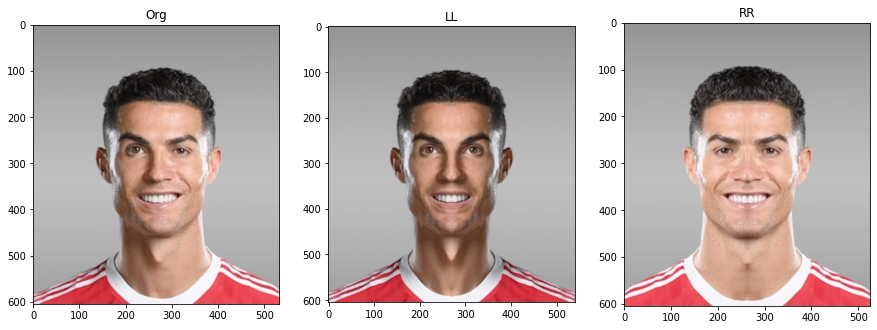

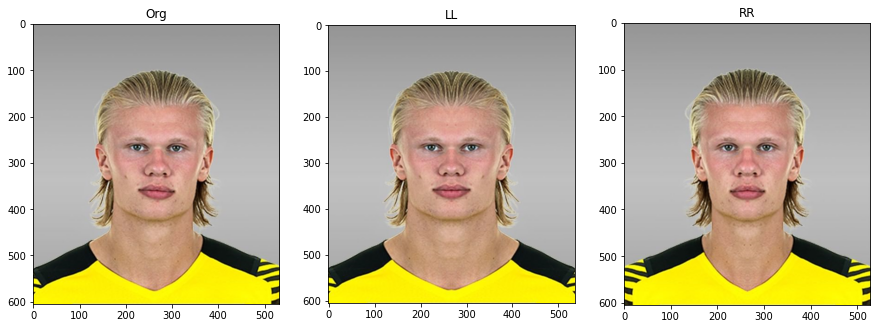

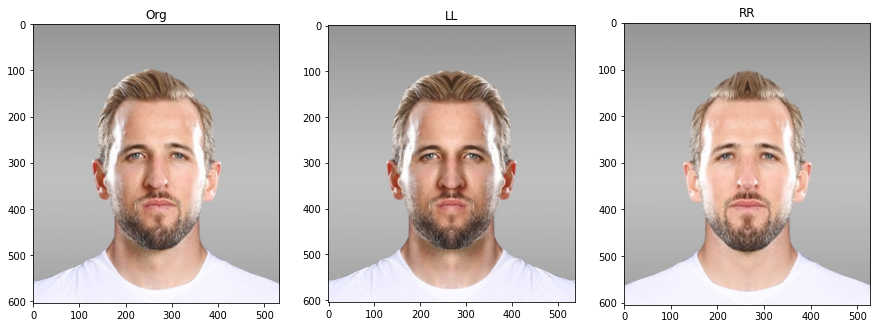

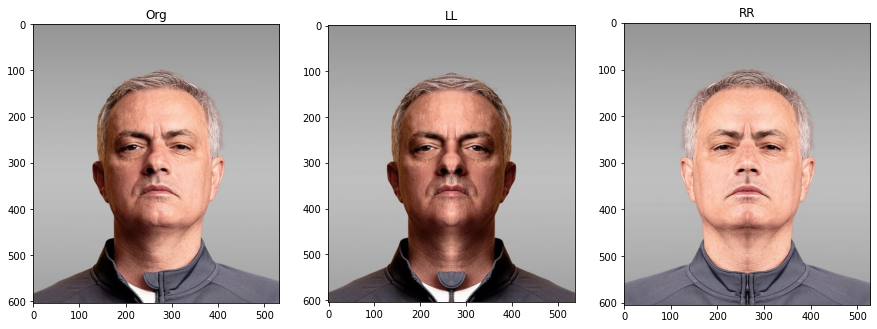

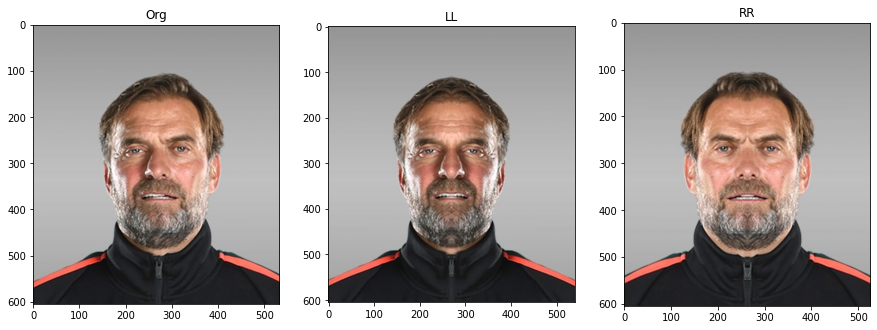

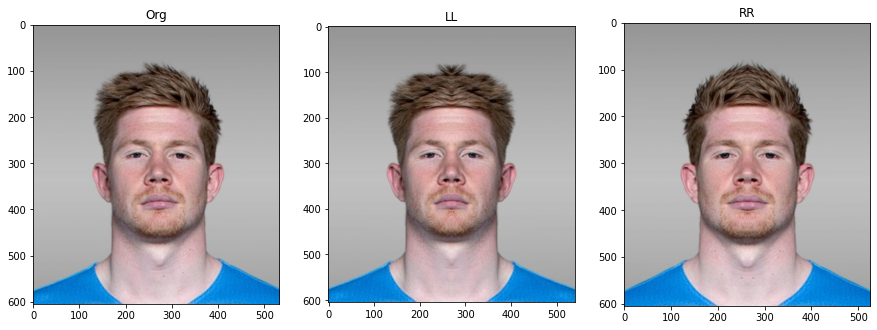

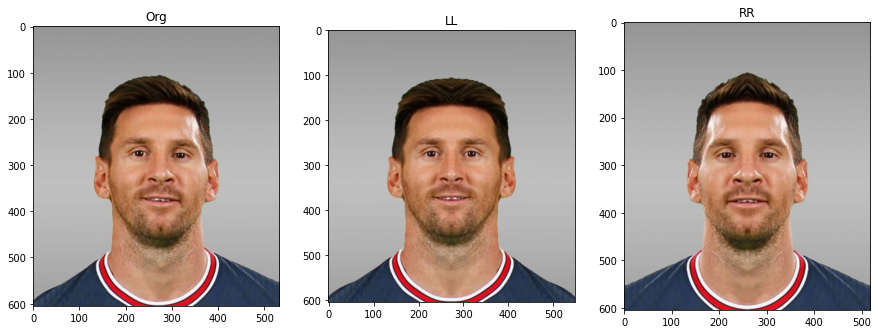

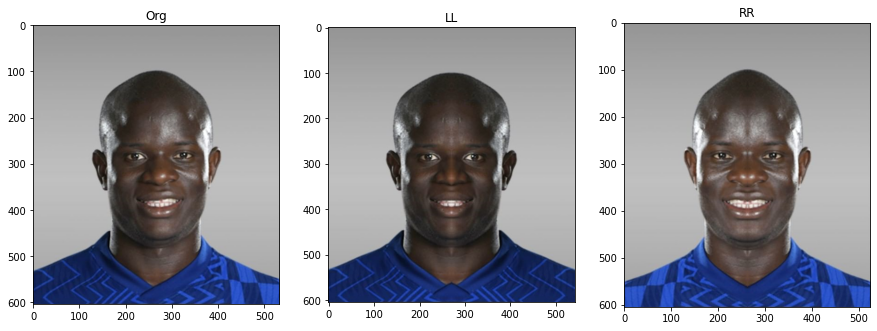

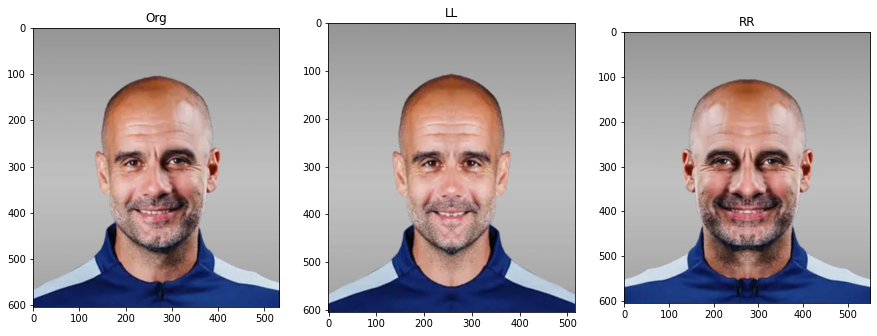

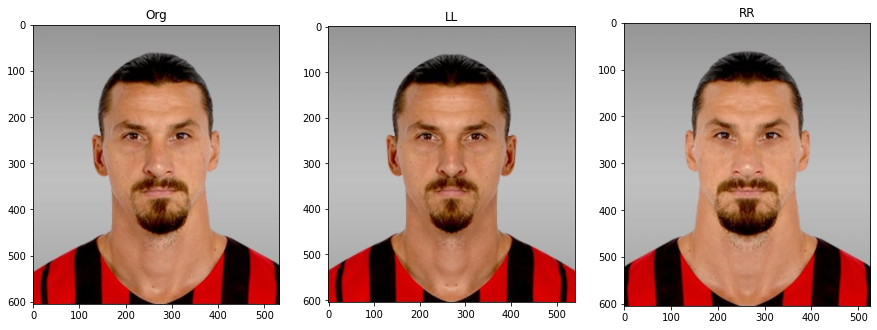

In [58]:
for name, img, point in zip(names, imgs, points):
    LL, RR = immirror(img, point)

    print('PNSR - SSIM for {}:'.format(name))
    print('  |_ LL: {} - {}'.format(impsnr(LL, img), imssim(LL, img)))
    print('  |_ RR: {} - {}'.format(impsnr(RR, img), imssim(RR, img)))
    fig, ax = plt.subplots(1, 3, figsize=(15, 10))
    
    ax[0].imshow(img)
    ax[0].set_title('Org')

    ax[1].imshow(LL)
    ax[1].set_title('LL')

    ax[2].imshow(RR)
    ax[2].set_title('RR')

### Finito